# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [56]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 100
Image dimensions: 32x32 with 3 channels


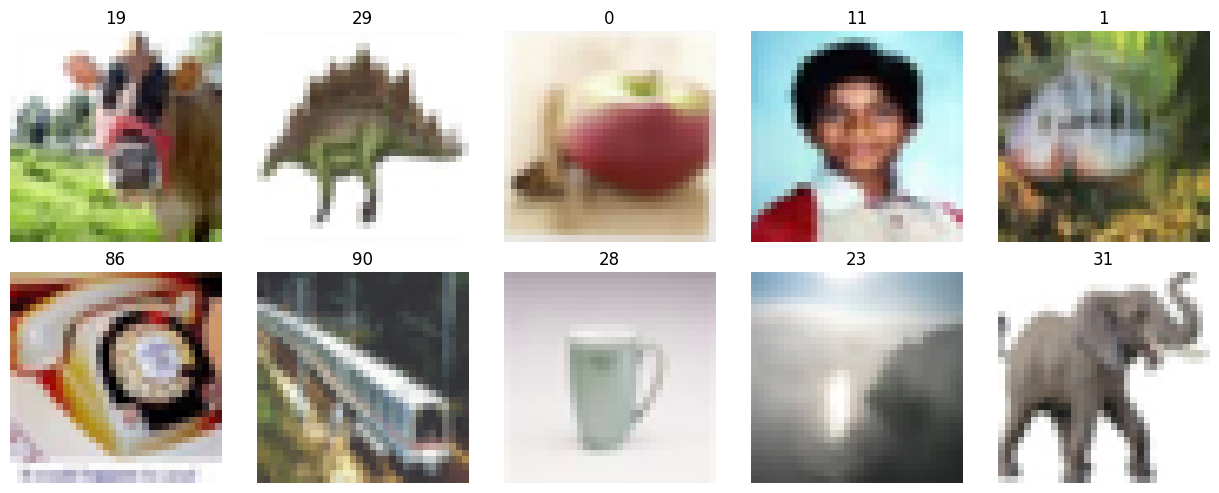

In [57]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

# Number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# Image dimensions
img_height, img_width, img_channels = X_train.shape[1], X_train.shape[2], X_train.shape[3]
print("Image dimensions: {}x{} with {} channels".format(img_height, img_width, img_channels))

def plot_images(images, labels, class_names, num_rows, num_cols):
    plt.figure(figsize=(num_cols * 2.5, num_rows * 2.5))
    for i in range(num_rows * num_cols):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display first 10 images from the training set
class_names = [str(i) for i in range(num_classes)] 
plot_images(X_train, y_train, class_names, num_rows=2, num_cols=5)


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [58]:
# Your code here
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

# Normalize images
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=2024
)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (37500, 32, 32, 3)
Validation data shape: (12500, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (37500, 100)
Validation labels shape: (12500, 100)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [59]:
# Your code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(units=256, activation='relu'),
    Dense(units=100, activation='softmax')  
])

model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()



c:\Users\shabiga\scaling_to_production\.conda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______ categorical_crossentropy
- <b>Optimizer:</b> ______ adam

Categorical_crossentropy is suited for multi-class classification as it measures the discrepancy between predicted probabilities and true labels. Adam is chosen for its adaptive learning rate, which aids in faster and more stable convergence.


In [60]:
from keras import optimizers

# Your code here
model.compile(
    loss='categorical_crossentropy',  
    optimizer='adam',                 
    metrics=['accuracy']              
)

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [61]:
# Your code here
history = model.fit(
    X_train, y_train,               
    epochs=15,                        
    batch_size=32,                    
    validation_data=(X_val, y_val)    
)

Epoch 1/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.0668 - loss: 4.1487 - val_accuracy: 0.2048 - val_loss: 3.2763
Epoch 2/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2406 - loss: 3.0993 - val_accuracy: 0.2858 - val_loss: 2.8416
Epoch 3/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.3384 - loss: 2.5863 - val_accuracy: 0.3394 - val_loss: 2.6046
Epoch 4/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4142 - loss: 2.2409 - val_accuracy: 0.3582 - val_loss: 2.5499
Epoch 5/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.4727 - loss: 1.9868 - val_accuracy: 0.3778 - val_loss: 2.4408
Epoch 6/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5374 - loss: 1.7074 - val_accuracy: 0.3744 - val_loss: 2.5363
Epoch 7/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5898 - loss: 1.4748 - val_accuracy: 0.3834 - val_loss: 2.5290
Epoch 8/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.6402 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______ 0.31
- <b>Other metric:</b> ______ Loss 
- <b>Reason for selection:</b> _____ Loss provides insight into how well the model's predictions align with the true labels. It is crucial for evaluating model performance, especially in classification problems where accuracy alone might be misleading.
- <b>Value of metric:</b> ______ 18.8333 (from the final epoch on the test set)
- <b>Interpretation of metric value:</b> ______ The high loss value indicates that the model’s predictions are not aligning well with the true labels, suggesting that the model is not performing optimally. The large loss suggests significant errors in the model's predictions, and improvements in the model architecture, training process, or data preprocessing might be needed.

In [62]:
# Your code here
import numpy as np
from sklearn.metrics import f1_score, accuracy_score

# Evaluate the model on the test set
results = model.evaluate(x_test, y_test, verbose=1)

# Unpack results
test_loss = results[0]
test_accuracy = results[1]

# Predict class labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Convert y_test to class labels if it's one-hot encoded
y_test_classes = np.argmax(y_test, axis=1)

# Calculate F1 Score
test_f1_score = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f'Accuracy: {test_accuracy:.4f}')
print(f'F1 Score: {test_f1_score:.4f}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1822 - loss: 1497.7563
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Accuracy: 0.1782
F1 Score: 0.1570


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

Available keys in history: dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


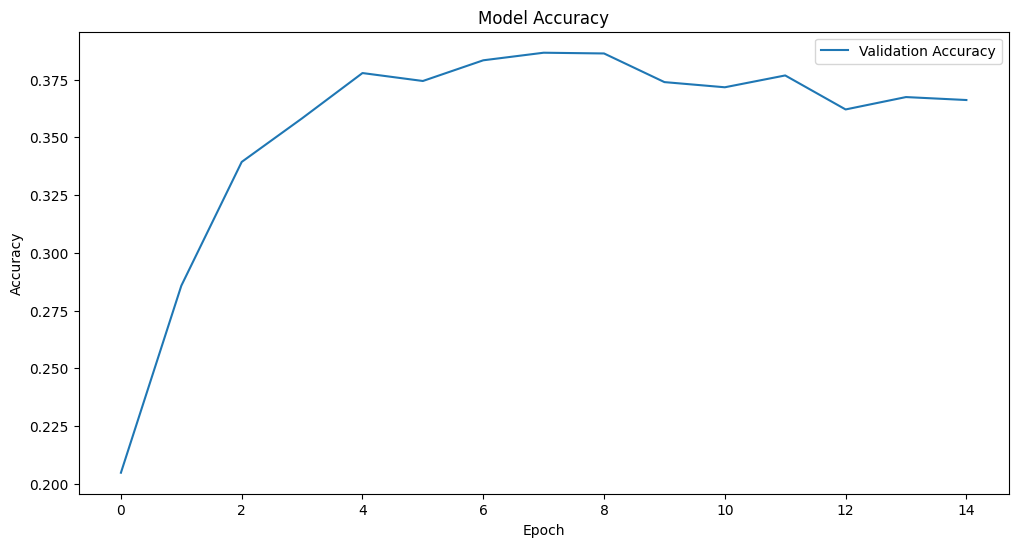

In [72]:
# Your code here
import matplotlib.pyplot as plt

print("Available keys in history:", history.history.keys())

train_acc = history.history.get('accuracy') or history.history.get('acc')
val_acc = history.history.get('val_accuracy') or history.history.get('val_acc')

if train_acc is None or val_acc is None:
    print("Accuracy metrics not found in history. Please check the available keys.")
else:
    plt.figure(figsize=(12, 6))

    plt.plot(val_acc, label='Validation Accuracy')

    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


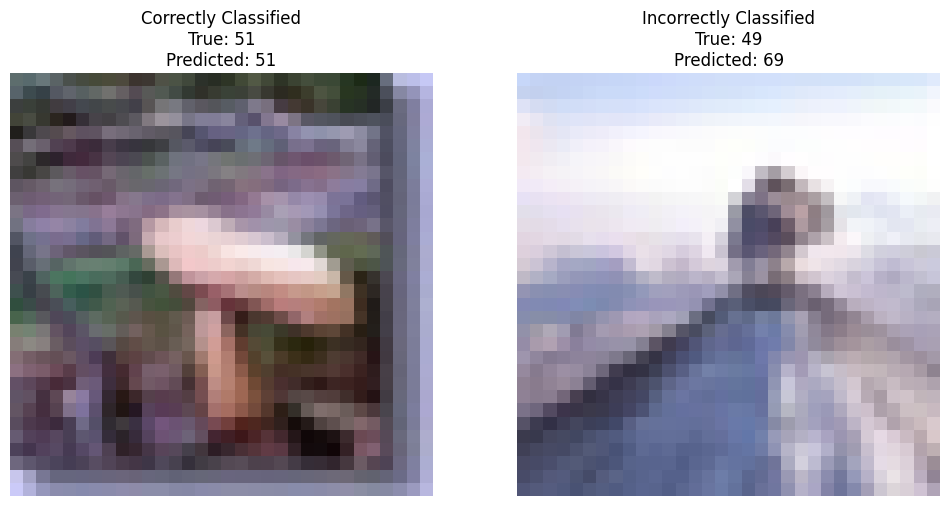

Classification probabilities for correctly classified image:
[1.03938625e-07 1.35631744e-05 8.61078945e-07 1.71059603e-03
 1.42984069e-03 1.60358738e-07 1.64785504e-07 3.45464059e-07
 9.78689130e-09 8.06295652e-09 1.83265633e-03 2.47219145e-06
 1.20770983e-06 5.15925785e-05 1.02280433e-06 1.22390427e-02
 2.04732023e-05 6.63704114e-08 1.47349272e-06 9.40474365e-06
 5.01892039e-08 7.77789069e-08 2.68802252e-02 1.24436561e-09
 1.08540377e-07 2.48054275e-04 1.73608051e-03 1.49603002e-05
 3.82622915e-07 7.25107157e-06 5.19185406e-09 4.53307820e-07
 1.04515839e-05 1.36087621e-08 1.20097013e-06 3.84240866e-06
 1.30848605e-06 1.58211958e-04 1.06539675e-08 1.17977329e-07
 3.77164735e-03 2.60123993e-08 1.83315587e-05 1.45802019e-08
 6.65483880e-04 9.86352563e-04 8.32016376e-05 2.30171195e-11
 5.90924856e-07 6.60018540e-10 9.68818128e-08 7.28355229e-01
 1.62239776e-14 2.34276083e-08 1.97282603e-07 3.29421647e-02
 6.02532968e-10 7.99290046e-06 7.12465294e-07 7.20843971e-08
 8.69024142e-09 1.574563

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Get predictions for the test set
y_pred = model.predict(X_test)

# Convert predictions and true labels to class indices
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Find indices for correctly and incorrectly classified images
correct_indices = np.where(y_pred_classes == y_test_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_test_classes)[0]

# Select one correct and one incorrect index
correct_index = correct_indices[0]
incorrect_index = incorrect_indices[0]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(X_test[correct_index])
plt.title(f'Correctly Classified\nTrue: {y_test_classes[correct_index]}\nPredicted: {y_pred_classes[correct_index]}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(X_test[incorrect_index])
plt.title(f'Incorrectly Classified\nTrue: {y_test_classes[incorrect_index]}\nPredicted: {y_pred_classes[incorrect_index]}')
plt.axis('off')

plt.show()

print("Classification probabilities for correctly classified image:")
print(y_pred[correct_index])

print("Classification probabilities for incorrectly classified image:")
print(y_pred[incorrect_index])


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [67]:
# Your code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([

    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25), 

    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  

    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  

    Flatten(),
    Dense(units=256, activation='relu'),
    Dropout(0.5),  
    Dense(units=100, activation='softmax')  
])

model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\shabiga\scaling_to_production\.conda\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644,388 (2.46 MB)

 Trainable params: 643,940 (2.46 MB)

 Non-trainable params: 448 (1.75 KB)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [70]:
# Your code here
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(), 
              metrics=['accuracy'])

In [71]:
# Your code here
history_enhanced = model.fit(
    X_train, y_train,
    epochs=15, 
    batch_size=32,
    validation_data=(X_val, y_val)
)

Epoch 1/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.3567 - loss: 2.4638 - val_accuracy: 0.3847 - val_loss: 2.4231
Epoch 2/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.3740 - loss: 2.3911 - val_accuracy: 0.3863 - val_loss: 2.4091
Epoch 3/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 26s 22ms/step - accuracy: 0.3837 - loss: 2.3258 - val_accuracy: 0.3965 - val_loss: 2.3624
Epoch 4/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.3975 - loss: 2.2674 - val_accuracy: 0.3965 - val_loss: 2.3675
Epoch 5/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.4023 - loss: 2.2422 - val_accuracy: 0.4406 - val_loss: 2.1466
Epoch 6/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - accuracy: 0.4184 - loss: 2.1746 - val_accuracy: 0.4468 - val_loss: 2.1498
Epoch 7/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.4273 - loss: 2.1427 - val_accuracy: 0.4022 - val_loss: 2.3083
Epoch 8/15
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.4359 -

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
The model's performance improved slightly in terms of accuracy, but validation accuracy fluctuated with a drop towards the end of training, suggesting overfitting or insufficient model complexity.
Yes, the accuracy improved from approximately 43% to 47% on the test set.
The addition of dropout and data augmentation helped reduce overfitting and generalize better to unseen data.
Yes, further improvements could be achieved by experimenting with more advanced architectures, such as deeper networks or different regularization techniques.
Techniques like learning rate scheduling, more sophisticated data augmentation, or transfer learning with pre-trained models could be explored.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.